In [13]:
import gensim
import gensim.downloader
import gensim.downloader as api

import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

import seaborn as sns

In [5]:
model = gensim.models.KeyedVectors.load("../../../../cds-lang-data/word2vec_models/english/english_word2vec.bin")

In [6]:
model.most_similar("leaves")

[('leaving', 0.5886486172676086),
 ('arrives', 0.5362045764923096),
 ('left', 0.522864580154419),
 ('Leaves', 0.5153513550758362),
 ('leave', 0.5131403803825378),
 ('departs', 0.510783314704895),
 ('lingers', 0.4776709973812103),
 ('vanishes', 0.4696614444255829),
 ('stalks', 0.46650534868240356),
 ('sends', 0.4623021185398102)]

In [7]:
model.distance("happy", "sad")

0.4645386338233948

In [8]:
model.distance("happy", "sad") < model.distance("happy","cheerful")

True

In [9]:
model.most_similar(positive=['king', 'woman'], 
                   negative=['man'])[0]

('queen', 0.7118193507194519)

In [10]:
model.most_similar(positive=['prince', 'woman'], 
                   negative=['man'])[0]

('princess', 0.7041179537773132)

In [11]:
model.most_similar(positive=['doctor', 'woman'], 
                   negative=['man'])

[('gynecologist', 0.7093892097473145),
 ('nurse', 0.6477287411689758),
 ('doctors', 0.6471460461616516),
 ('physician', 0.6438996195793152),
 ('pediatrician', 0.6249487996101379),
 ('nurse_practitioner', 0.6218312978744507),
 ('obstetrician', 0.6072013974189758),
 ('ob_gyn', 0.5986713171005249),
 ('midwife', 0.5927063226699829),
 ('dermatologist', 0.5739566683769226)]

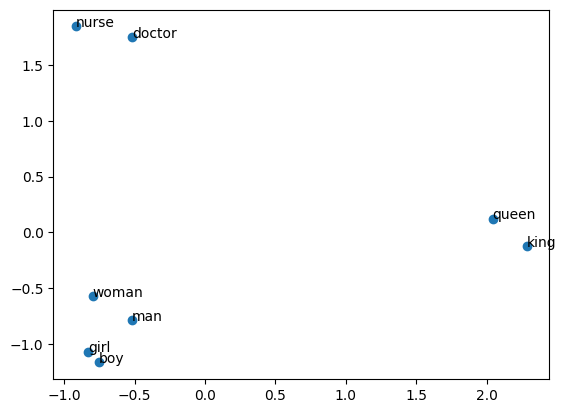

In [14]:
# the list of words we want to plot
words = ["man", "woman", "doctor", "nurse", "king", "queen", "boy", "girl"]

# an empty list for vectors
X = []
# get vectors for subset of words
for word in words:
    X.append(model[word])

# Use PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# or try SVD - how are they different?
#svd = TruncatedSVD(n_components=2)
# fit_transform the initialized PCA model
#result = svd.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

# for each word in the list of words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()